In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

from mlscorecheck.auc import auc_from_sens_spec, acc_from_auc

In [20]:
data = pd.read_csv('kfold.csv')

In [21]:
data.head()

,Unnamed: 0,dataset,k,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,best_threshold,best_acc_orig,p,n
0,0,abalone9_18,5,0.908400,0.48056,0.93474,0.716189,0.942560,0.000000,1.000000,0.055180,inf,0.942560,42,689
1,1,appendicitis,10,0.803650,0.45000,0.89584,0.743056,0.812740,0.533330,0.884730,0.986773,0.333333,0.812740,21,85
2,2,australian,2,0.581150,0.06205,0.99740,0.716153,0.682600,0.582900,0.762500,0.932181,0.419671,0.682600,307,383
3,3,bupa,7,0.420314,1.00000,0.00000,0.732123,0.706886,0.635371,0.760371,0.046065,0.453388,0.706886,145,200
4,4,CM1,5,0.901620,0.00000,1.00000,0.597264,0.901620,0.000000,1.000000,0.859359,inf,0.901620,49,449


In [22]:
data['auc_min_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['acc'], 'sens': row['sens'], 'spec': row['spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='max'
        ), 
axis=1)

data['auc_cmin_max_int'] = data.apply(
    lambda row:
    auc_from_sens_spec(
        scores={'acc': row['acc'], 'sens': row['sens'], 'spec': row['spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='max'
        ),
axis=1)

data['auc_max_acc_min_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='max'
        ), 
axis=1)

data['auc_max_acc_cmin_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='max'
        ), 
axis=1)

data['auc_max_acc_min_amax_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='amax'
        ), 
axis=1)

data['auc_max_acc_cmin_amax_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='amax'
        ), 
axis=1)

In [23]:
data['acc_min_max_int'] = data.apply(
    lambda row: 
    acc_from_auc(
        scores={'auc': row['auc']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        upper='max'
        ), 
axis=1)

data['acc_min_cmax_int'] = data.apply(
    lambda row: 
    acc_from_auc(
        scores={'auc': row['auc']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        upper='cmax'
        ), 
axis=1)

In [24]:
for label in ['auc_min_max_int', 'auc_cmin_max_int', 
              'auc_max_acc_min_max_int', 'auc_max_acc_cmin_max_int', 
              'auc_max_acc_min_amax_int', 'auc_max_acc_cmin_amax_int', 
              'acc_min_max_int', 'acc_min_cmax_int']:
    data[label[:-4]] = data[label].apply(lambda x: None if x is None else (x[0] + x[1])/2.0)

In [25]:
data['auc_min_max_diff'] = data['auc'] - data['auc_min_max']
data['auc_cmin_max_diff'] = data['auc'] - data['auc_cmin_max']
data['auc_max_acc_min_max_diff'] = data['auc'] - data['auc_max_acc_min_max']
data['auc_max_acc_cmin_max_diff'] = data['auc'] - data['auc_max_acc_cmin_max']
data['auc_max_acc_min_amax_diff'] = data['auc'] - data['auc_max_acc_min_amax']
data['auc_max_acc_cmin_amax_diff'] = data['auc'] - data['auc_max_acc_cmin_amax']

data['acc_min_max_diff'] = data['acc'] - data['acc_min_max']
data['acc_min_cmax_diff'] = data['best_acc'] - data['acc_min_cmax']

In [26]:
figsize = (3.5, 2)
figsize2 = (2, 2)
n_bins = 20

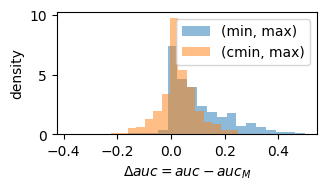

In [27]:
plt.figure(figsize=figsize)
plt.hist(data['auc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_cmin_max_diff'], label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta auc = auc - auc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-hist-kfold.pdf')
plt.show()

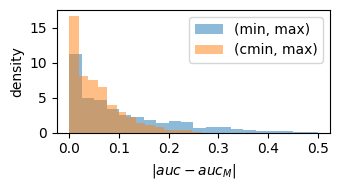

In [28]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['auc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_cmin_max_diff']), label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert auc - auc_M\vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-abs-hist-kfold.pdf')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1098257/967181890.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta auc_M$ (cmin, max)')


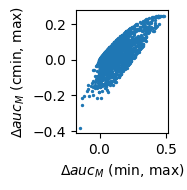

In [29]:
plt.figure(figsize=figsize2)
plt.scatter(data['auc_min_max_diff'], data['auc_cmin_max_diff'], s=2)
plt.xlabel(r'$\Delta auc_M$ (min, max)')
plt.ylabel('$\Delta auc_M$ (cmin, max)')
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-scatter-kfold.pdf')
plt.show()

In [30]:
wilcoxon(
    np.abs(data.dropna()['auc_cmin_max_diff']), 
    np.abs(data.dropna()['auc_min_max_diff']), 
    alternative='less'
)

WilcoxonResult(statistic=np.float64(102246.0), pvalue=np.float64(2.055061841787938e-202))

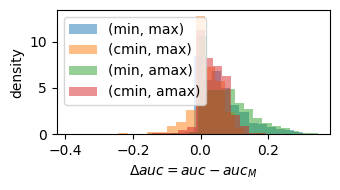

In [31]:
plt.figure(figsize=figsize)
plt.hist(data['auc_max_acc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_cmin_max_diff'], label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_min_amax_diff'], label='(min, amax)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_cmin_amax_diff'], label='(cmin, amax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta auc = auc - auc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-hist-kfold.pdf')
plt.show()

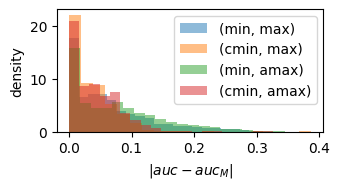

In [32]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['auc_max_acc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_cmin_max_diff']), label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_min_amax_diff']), label='(min, amax)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_cmin_amax_diff']), label='(cmin, amax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert auc - auc_M\vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-abs-hist-kfold.pdf')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1098257/3396233447.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta auc_M$ (cmin, amax)')


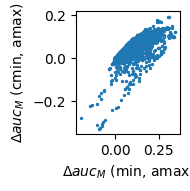

In [33]:
plt.figure(figsize=figsize2)
plt.scatter(data['auc_max_acc_min_amax_diff'], data['auc_max_acc_cmin_amax_diff'], s=2)
plt.xlabel(r'$\Delta auc_M$ (min, amax)')
plt.ylabel('$\Delta auc_M$ (cmin, amax)')
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-scatter-kfold.pdf')
plt.show()

In [37]:
wilcoxon(
    np.abs(data.dropna()['auc_max_acc_cmin_amax_diff']), 
    np.abs(data.dropna()['auc_max_acc_min_amax_diff']), 
    alternative='less'
)

WilcoxonResult(statistic=np.float64(45940.0), pvalue=np.float64(1.124680898960256e-241))

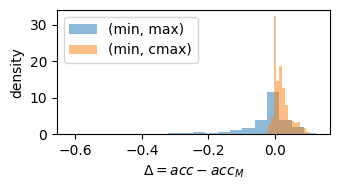

In [34]:
plt.figure(figsize=figsize)
plt.hist(data['acc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['acc_min_cmax_diff'], label='(min, cmax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta = acc - acc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-hist-kfold.pdf')
plt.show()

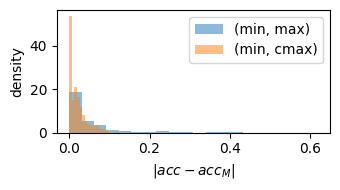

In [35]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['acc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['acc_min_cmax_diff']), label='(min, cmax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert acc - acc_M \vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-abs-hist-kfold.pdf')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1098257/4026538229.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta acc_M$ (min, amax)')


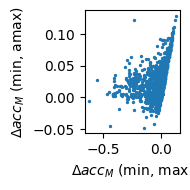

In [36]:
plt.figure(figsize=figsize2)
plt.scatter(data['acc_min_max_diff'], data['acc_min_cmax_diff'], s=2)
plt.xlabel(r'$\Delta acc_M$ (min, max)')
plt.ylabel('$\Delta acc_M$ (min, amax)')
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-scatter-kfold.pdf')
plt.show()